# Data Processing and Analysis : GSM3130435_egfp_unmod_1

#### In this notebook, we load the data GSM3130435_egfp_unmod_1, preprocess it and analyze it.

#### This data is composed of 300,000 5' UTRs of fixed length 50 nucleotides.

In [1]:
#Imports

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn import preprocessing

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['agg.path.chunksize'] = 0
mpl.rcParams.update( mpl.rc_params() )
plt.rcParams.update({'font.size': 18})
#plt.rcParams.update({'text.usetex': True})
plt.rcParams.update({'text.latex.preamble': 'bold'})
plt.rc('font', family='serif')

## 1. We load the data.

In [3]:
data_path = "Data/GSM3130435_egfp_unmod_1.csv.gz"
df = pd.read_csv(data_path, compression='gzip')
df


,Unnamed: 0,utr,0,1,2,3,4,5,6,7,...,r5,r6,r7,r8,r9,r10,r11,r12,r13,rl
0,120605,CCACTCGATTAACATGTTAACAACATACTCGTCCGGCCGATCAGCG...,1.365472e-04,1.090036e-04,0.000057,0.000033,0.000015,0.000016,9.415128e-06,0.000009,...,0.033645,0.020343,0.019850,0.017988,0.019283,0.033252,0.033252,0.027581,0.035877,3.039939
1,11605,CAAATCATGTGCAGCCCTGGCGACCGTACTGCGGTACAAGAAAGTA...,6.661179e-05,6.952406e-05,0.000065,0.000048,0.000023,0.000020,1.128378e-05,0.000011,...,0.049711,0.028540,0.027431,0.024766,0.024241,0.039457,0.039457,0.039840,0.038785,3.895109
2,128224,GTTATACTAGAAGAAACTTGAGATTATGGAGCAGTCCGTCAAGGAC...,8.798774e-05,8.087227e-05,0.000059,0.000035,0.000017,0.000016,8.516738e-06,0.000009,...,0.042436,0.022460,0.025015,0.024275,0.021591,0.028353,0.028353,0.028963,0.041985,3.334524
3,239107,CTTAGACAAAAACAACGCGCTTTCCAGTATGCGGAGCCTTGACGGT...,7.773708e-05,7.108933e-05,0.000060,0.000038,0.000025,0.000016,9.738549e-06,0.000009,...,0.041241,0.025793,0.022751,0.022632,0.026617,0.038302,0.038302,0.032788,0.031043,3.575082
4,59082,GTATCAAATCACGGCCAACCCGACGGAGTACCCCGCGTCGATGGTC...,4.373148e-05,4.452323e-05,0.000050,0.000051,0.000033,0.000026,1.494921e-05,0.000012,...,0.071306,0.040719,0.033335,0.030367,0.033080,0.051449,0.051449,0.046052,0.036447,4.593712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326028,321695,ACTAACGTGGGGCCTAAACAAGTGCAAACACCCCCACGGACCCCCA...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.796780e-07,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.800000
326029,321690,GAAAGCGGTTGAAACTACTCATACGTACAAGGTAAACATTTAAAAG...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.796780e-07,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.800000
326030,254099,GGCTATGGCCGAAATAAATAAAGCGCGAGCCCGTAGGTACGAGCAA...,1.749259e-07,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
326031,321677,CCGGCCAGTGCGCTGAAATACGTATAAGGTGGGTCGACGTAAAAAA...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.796780e-07,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.800000


### We check that the sequences have the same length as we expect.

In [4]:
df["Length"] = df["utr"].apply(len)

In [5]:
df["Length"].unique()

array([50])

In [6]:
df["utr"][0]

'CCACTCGATTAACATGTTAACAACATACTCGTCCGGCCGATCAGCGGCTA'

In [7]:
df["rl"][0]

3.03993899561

In [8]:
df["total_reads"][0]

12126.0

## 2. We select the data with sufficient amounts of reads. (higher quality)

#### As in the paper, we will select the first 280 000 values (highest number of reads) which correspond to the higher quality data. 

In [9]:
df = df.sort_values('total_reads', ascending=False)
df = df.reset_index(drop=True)
df.head()

,Unnamed: 0,utr,0,1,2,3,4,5,6,7,...,r6,r7,r8,r9,r10,r11,r12,r13,rl,Length
0,120605,CCACTCGATTAACATGTTAACAACATACTCGTCCGGCCGATCAGCG...,0.000137,0.000109,0.000057,0.000033,0.000015,0.000016,0.000009,0.000009,...,0.020343,0.019850,0.017988,0.019283,0.033252,0.033252,0.027581,0.035877,3.039939,50
1,11605,CAAATCATGTGCAGCCCTGGCGACCGTACTGCGGTACAAGAAAGTA...,0.000067,0.000070,0.000065,0.000048,0.000023,0.000020,0.000011,0.000011,...,0.028540,0.027431,0.024766,0.024241,0.039457,0.039457,0.039840,0.038785,3.895109,50
2,128224,GTTATACTAGAAGAAACTTGAGATTATGGAGCAGTCCGTCAAGGAC...,0.000088,0.000081,0.000059,0.000035,0.000017,0.000016,0.000009,0.000009,...,0.022460,0.025015,0.024275,0.021591,0.028353,0.028353,0.028963,0.041985,3.334524,50
3,239107,CTTAGACAAAAACAACGCGCTTTCCAGTATGCGGAGCCTTGACGGT...,0.000078,0.000071,0.000060,0.000038,0.000025,0.000016,0.000010,0.000009,...,0.025793,0.022751,0.022632,0.026617,0.038302,0.038302,0.032788,0.031043,3.575082,50
4,59082,GTATCAAATCACGGCCAACCCGACGGAGTACCCCGCGTCGATGGTC...,0.000044,0.000045,0.000050,0.000051,0.000033,0.000026,0.000015,0.000012,...,0.040719,0.033335,0.030367,0.033080,0.051449,0.051449,0.046052,0.036447,4.593712,50


#### We drop the sequences with low amount of total_reads as they are considered less reliable/qualitative.

In [11]:
df['Selection'] = "Selected Data"
for i in range(len(df)):
    if ( i > 280000):
        df['Selection'][i] = "Unconsidered Data"

<ipython-input-11-c856db5919e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Selection'][i] = "Unconsidered Data"


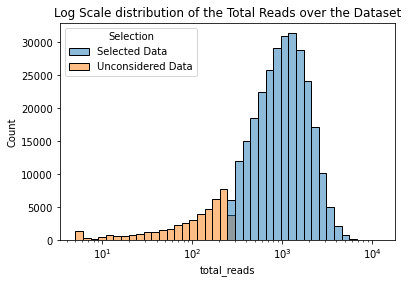

In [12]:
sns.histplot(data=df, x="total_reads", hue = "Selection", bins = 40, log_scale=True)
 
# Show the plot
plt.title("Log Scale distribution of the Total Reads over the Dataset")
plt.show()

In [13]:
df = df.iloc[:280000]

## 3. We one-hot encode the sequences and scale the MRL (Mean Ribosome Load).

### We one-hot encode sequences to later use them in models such as CNN, RNN, ...

In [ ]:
def one_hot_helper(sequence):
    """
    This function takes in a sequence and returns a one hot encoded list. 
    """
    one_hot_dictionnary = {'A':[1,0,0,0],'C':[0,1,0,0],'G':[0,0,1,0],'T':[0,0,0,1]}
    one_hot_encoded = [one_hot_dictionnary[s] for s in sequence]
    return one_hot_encoded    

In [ ]:
df["one-hot encoding"] = df["utr"].apply(one_hot_helper)
df["one-hot encoding"]

### We scale the mean ribosome load using the z-score.

The Z-score from sklearn.preprocessing standardizes features by removing the mean and scaling to unit variance, which can help in seeral machine learning models.

In [ ]:
df.loc[:,'scaled_rl'] = preprocessing.StandardScaler().fit_transform(df.loc[:,'rl'].values.reshape(-1,1))
df.loc[:,'scaled_rl']

## 4. We save the preprocessed data. 

In [ ]:
df.head()

In [ ]:
df.to_csv("Data/GSM3130435_egfp_unmod_1_PREPROCESSED.csv.gz", index=False, compression='gzip')

## 5. We analyze our preprocessed data before starting any basemodels.

In [14]:
df = pd.read_csv("Data/GSM3130435_egfp_unmod_1_PREPROCESSED.csv.gz", compression='gzip')

In [15]:
df

,Unnamed: 0,utr,0,1,2,3,4,5,6,7,...,r9,r10,r11,r12,r13,rl,Length,Selection,one-hot encoding,scaled_rl
0,120605,CCACTCGATTAACATGTTAACAACATACTCGTCCGGCCGATCAGCG...,1.365472e-04,1.090036e-04,5.717043e-05,3.318598e-05,1.533480e-05,1.557127e-05,9.415128e-06,9.186945e-06,...,0.019283,0.033252,0.033252,0.027581,0.035877,3.039939,50,Selected Data,"[[0, 1, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [0,...",-2.130922
1,11605,CAAATCATGTGCAGCCCTGGCGACCGTACTGCGGTACAAGAAAGTA...,6.661179e-05,6.952406e-05,6.474759e-05,4.825420e-05,2.278452e-05,1.965422e-05,1.128378e-05,1.084524e-05,...,0.024241,0.039457,0.039457,0.039840,0.038785,3.895109,50,Selected Data,"[[0, 1, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1,...",-1.600332
2,128224,GTTATACTAGAAGAAACTTGAGATTATGGAGCAGTCCGTCAAGGAC...,8.798774e-05,8.087227e-05,5.913157e-05,3.462105e-05,1.668930e-05,1.609165e-05,8.516738e-06,9.485438e-06,...,0.021591,0.028353,0.028353,0.028963,0.041985,3.334524,50,Selected Data,"[[0, 0, 1, 0], [0, 0, 0, 1], [0, 0, 0, 1], [1,...",-1.948147
3,239107,CTTAGACAAAAACAACGCGCTTTCCAGTATGCGGAGCCTTGACGGT...,7.773708e-05,7.108933e-05,5.999329e-05,3.845986e-05,2.476788e-05,1.557127e-05,9.738549e-06,8.589960e-06,...,0.026617,0.038302,0.038302,0.032788,0.031043,3.575082,50,Selected Data,"[[0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1], [1,...",-1.798893
4,59082,GTATCAAATCACGGCCAACCCGACGGAGTACCCCGCGTCGATGGTC...,4.373148e-05,4.452323e-05,5.048470e-05,5.116022e-05,3.250785e-05,2.617895e-05,1.494921e-05,1.223821e-05,...,0.033080,0.051449,0.051449,0.046052,0.036447,4.593712,50,Selected Data,"[[0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0,...",-1.166885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279995,16513,TCGCTTTGAGGCGCACGTGAAACGCAGCAACCCCCTCGAAGTTGTC...,3.148667e-07,5.217566e-07,3.862867e-07,2.511371e-07,4.837477e-07,1.040753e-06,7.546477e-07,6.301515e-07,...,0.106003,0.076790,0.076790,0.100890,0.080051,7.575412,50,Selected Data,"[[0, 0, 0, 1], [0, 1, 0, 0], [0, 0, 1, 0], [0,...",0.683110
279996,285471,CGCTAGAACCAGGAGCAACGTAGCGTAAGGGGAATATGAAGGAAAA...,2.448963e-07,0.000000e+00,0.000000e+00,2.152604e-07,1.064245e-06,9.606952e-07,1.006197e-06,1.028142e-06,...,0.131180,0.120036,0.120036,0.034284,0.104277,8.040876,50,Selected Data,"[[0, 1, 0, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0,...",0.971907
279997,314941,GGTGAACGACGAGACAATAACGTGGGCCTTTAAAGGAATAGGGCAA...,0.000000e+00,0.000000e+00,0.000000e+00,3.228906e-07,0.000000e+00,1.120811e-06,6.827765e-07,1.293469e-06,...,0.192586,0.073631,0.073631,0.084121,0.089775,8.390005,50,Selected Data,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0,...",1.188525
279998,186905,CCGGAGTATTACATCACACATGAGCCCGGTGGGGATGTTGGGGAGC...,1.784244e-06,2.347905e-06,1.782862e-06,1.435069e-06,2.418739e-07,0.000000e+00,5.030985e-07,4.643221e-07,...,0.051714,0.000000,0.000000,0.044445,0.000000,2.925720,50,Selected Data,"[[0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0,...",-2.201790


### Distribution of the mean ribosome load accross the data

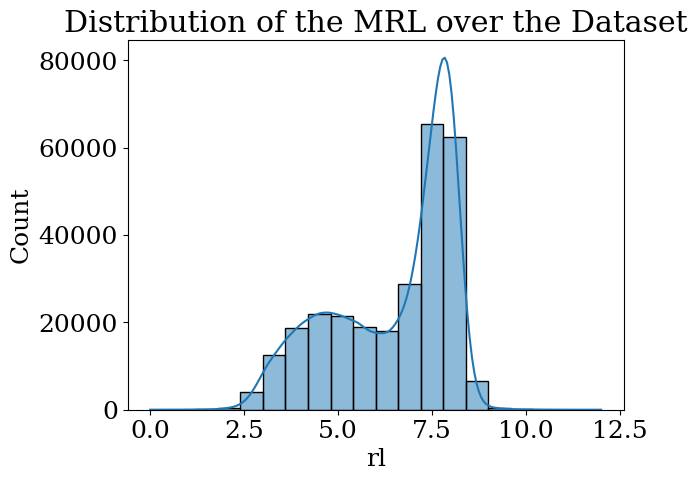

In [54]:
sns.histplot(data=df, x="rl", bins = 20, kde=True)
 
# Show the plot
plt.title("Distribution of the MRL over the Dataset")
plt.show()

We observe that our data follows a bit a bimodal distribution with a peak around 5 and a peak around 8. 

We observe the same phenomenon after scaling. 

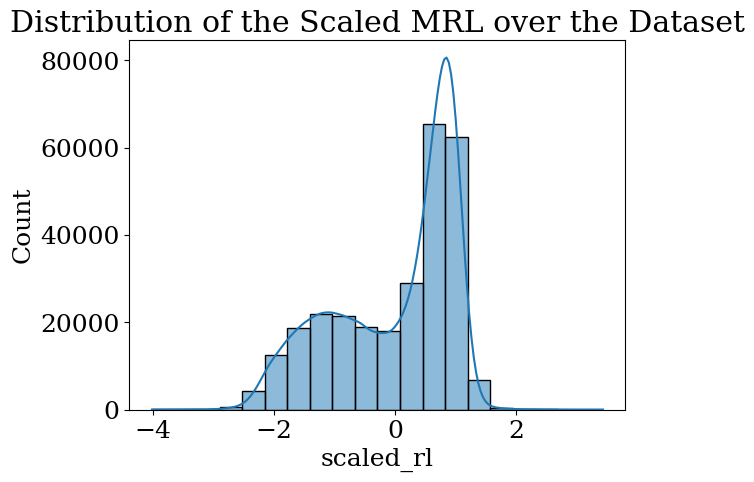

In [55]:
sns.histplot(data=df, x="scaled_rl", bins = 20, kde=True)
 
# Show the plot
plt.title("Distribution of the Scaled MRL over the Dataset")
plt.show()

### We know that ATG's in the 5' UTRs play a significant role in expression in function of their positions. 

This phenomenon has been noted trhoughout Litterature as well as in the paper of the Seelig Lab. Let us observe the presence of ATGs vs. the MRL.

In [56]:
df['ATG'] = df['utr'].apply(lambda x: 'ATG' in x)
df['ATG']

0          True
1          True
2          True
3          True
4          True
          ...  
279995    False
279996     True
279997    False
279998     True
279999     True
Name: ATG, Length: 280000, dtype: bool

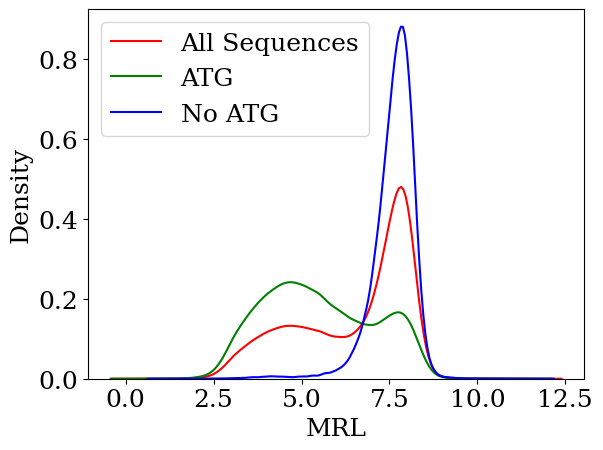

In [60]:
sns.kdeplot(data=df.squeeze(), x="rl", color="red", label='All Sequences')
sns.kdeplot(data=df[df['ATG'] == True].squeeze(), x="rl", color="green", label='ATG')
sns.kdeplot(data=df[df['ATG'] == False].squeeze(), x="rl", color="blue", label='No ATG')
plt.legend(loc='upper left')
plt.xlabel("MRL")
# Show the plot
plt.savefig("MRL_dataset_1.png", bbox_inches = "tight")
plt.show()

No handles with labels found to put in legend.


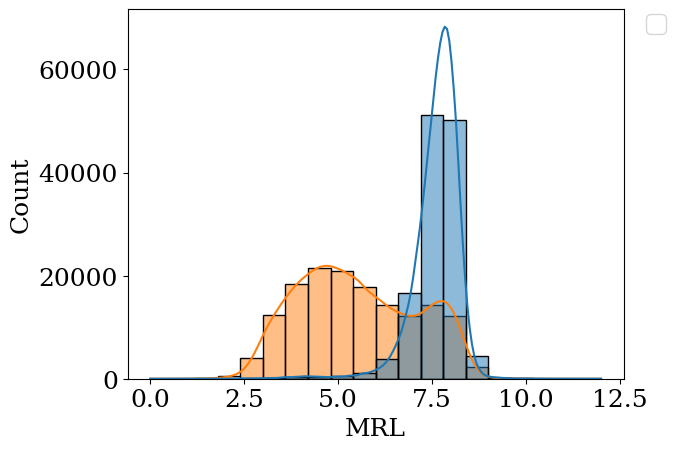

In [61]:
sns.histplot(data=df, hue = "ATG", x="rl", bins = 20, kde=True)
plt.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')
plt.xlabel("MRL")
# Show the plot
plt.show()

We observe that 5' UTRs without an ATG have generally a higher MRL than 5', concentrated between 6 and 8.

In [81]:
df['number of ATG'] = df['utr'].apply(lambda x: x.count('ATG'))
df['number of ATG'].value_counts()

0    128941
1    104141
2     37759
3      7879
4      1152
5       120
6         8
Name: number of ATG, dtype: int64

In [ ]:
sns.boxplot(x="number of ATG", y="rl", data=df)